In [ ]:
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Testing the Negamax Search Algorithm

This notebook runs an automated test suite to verify that the negamax search algorithm works as intended. These automated tests are performed on top of manual tests, where we play against the negamax search algorithm with and without memoization and verify that we can explain every move it makes.

### Dependencies

In [ ]:
import chess

import import_ipynb
import TestUtil
from NegamaxAlgorithm import NegamaxSearch, NegamaxSearchMemo

In the following, it is tested if memoization does not alter the move that the negamax search algorithm chooses in a variety of positions. Since memoization is only a performance optimization, both variations should always make the same move.

In [3]:
TestUtil.perform_fen_tests(NegamaxSearch, NegamaxSearchMemo)

0. Test code r4rk1/p1p1np1p/2p1b1p1/2PpN3/3P1P2/1N5P/Pq4P1/R2Q1RK1 b - - 0 15 PASSED: (Move.from_uci('b2c3'), -90) = (Move.from_uci('b2c3'), -90)
1. Test code 7n/3NR3/1P3p2/1p1kbN1B/1p6/1K6/6b1/1Q6 PASSED: (Move.from_uci('b1f1'), 10000002) = (Move.from_uci('b1f1'), 10000002)
2. Test code 3KN3/2B2R2/6n1/8/4k2n/4p3/4B3/3R4 PASSED: (Move.from_uci('c7b8'), 10000002) = (Move.from_uci('c7b8'), 10000002)
3. Test code 2N5/7B/3R4/Rb2k1p1/3rpr2/2B5/1NP2P1Q/4K3 PASSED: (Move.from_uci('a5b5'), 10000004) = (Move.from_uci('a5b5'), 10000004)
4. Test code 8/8/5p2/5p2/2K5/2R2P2/2R2PN1/5Nk1 PASSED: (Move.from_uci('f1e3'), 70) = (Move.from_uci('f1e3'), 70)
5. Test code 8/3k1P2/1K3B2/3B4/8/8/8/8 PASSED: (Move.from_uci('f7f8r'), 10000003) = (Move.from_uci('f7f8r'), 10000003)
6. Test code 1r2k3/2Q3P1/2p3Kb/6n1/8/8/8/8 PASSED: (Move.from_uci('g7g8n'), 10000002) = (Move.from_uci('g7g8n'), 10000002)
7. Test code rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w - - 0 1 PASSED: (Move.from_uci('g1f3'), 0) = (Move.fr

All tests above passed, therefore we assume that memoization does not affect the move that's made.

In the following, the effectiveness of memoization is tested. Negamax with and without memoization play a game of chess against each other and the time they take to make a move is measured. We expect memoization to be faster on average. This test is performed on a Windows PC with an AMD Ryzen 5 1600X processor (3.60 GHz, 6 cores) with 16 GB RAM.

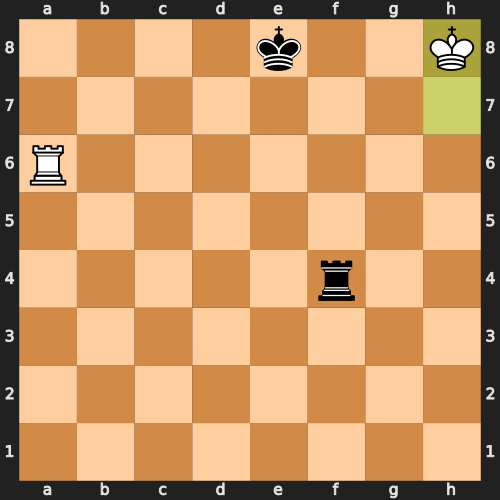

Search time: 23.861500024795532 seconds
Move: h7h8
Predicted move sequence: h7h8
Move score: 500000
Used endgame tablebase: False
Board score for white: -25
The game has ended. It's a draw!

Outcome(termination=<Termination.FIVEFOLD_REPETITION: 5>, winner=None)
Negamax search (white) move times. Mean: 78.63396776083744, std. dev: 117.13891109514778
Negamax search with memoization (black) move times. Mean: 42.429948450968816, std. dev: 63.09473400218836


In [2]:
TestUtil.perform_full_game_test(
    algorithm_white=NegamaxSearch,
    algo_name_white='Negamax search',
    algorithm_black=NegamaxSearchMemo,
    algo_name_black='Negamax search with memoization'
)

As we can see, based on this test, memoization makes the search roughly twice as fast on average. Of course, the exact number may vary with different games of chess. Nevertheless, we can assume that memoization optimizes the search.

Lastly, we test if the negamax search algorithm is able to solve simple chess problems. In these problems, the goal is to find a checkmate as white in as few moves as possible. This test is limited to problems that require a search depth of 4 or less, as negamax search takes an unrealistic amount of time on higher search depths.

We previously showed that, according to our tests, memoization does not affect the move being made. Therefore, it shouldn't matter if we enable memoization in these tests. Because we showed that memoization makes the algorithm more efficient on average, we enable it in these tests.

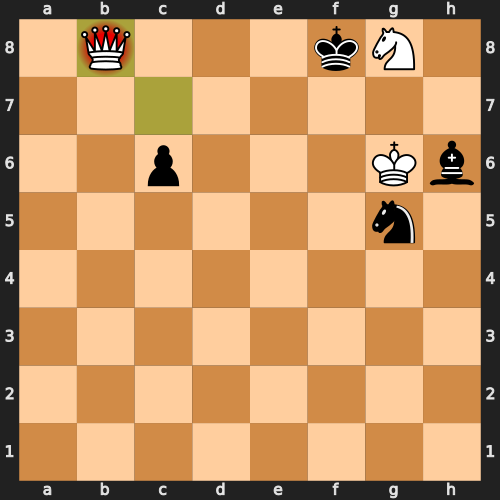

Search time: 1.8349995613098145 seconds
Move: c7b8
Predicted move sequence: c7b8
Move score: 10000003
Used endgame tablebase: False
Board score for white: 460
The game has ended. White is the winner!

Outcome(termination=<Termination.CHECKMATE: 1>, winner=True)
{'AD': [(10000002, 'f7f8r', False),
        (-10000003, 'd7d6', False),
        (10000003, 'f8d8', False)],
 'AF': [(10000001, 'c7b8', False),
        (-10000002, 'g6h8', False),
        (10000003, 'f7f4', False)],
 'AJW': [(10000001, 'b1f1', False),
         (-10000002, 'h8f7', False),
         (10000003, 'f1g2', False)],
 'BWS': [(10000001, 'g7g8n', False),
         (-10000002, 'e8f8', False),
         (10000003, 'c7b8', False)]}

['white', 'white', 'white', 'white']


In [3]:
TestUtil.perform_chess_problem_tests(NegamaxSearchMemo, max_depth=4)

Negamax search was able to find an optimal solution for all chess problems with a search depth of 4 or less.

Altogether, the results of these tests suggest that negamax search works as intended.